<a href="https://colab.research.google.com/github/mteoraso/Offshore_Wind_Energy/blob/main/notebooks/EDA_offshore_wind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
#################################################################################################################
## Data management
#################################################################################################################
import pandas as pd
import numpy as np

#################################################################################################################
## Data Viz
#################################################################################################################
import seaborn as sns
sns.set_theme(style="whitegrid", palette="bright")
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#################################################################################################################
## Statistical analysis
#################################################################################################################
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  ## Autocorrelacion en series de tiempo
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA  ## Analisis de regresion en series de tiempo
from statsmodels.formula.api import ols ## ANOVA de dos o multiples vias con efectos aleatorios
from statsmodels.formula.api import mixedlm ## ANOVA de dos o multiples vias con efectos mixtos
from scipy.stats import chi2_contingency ## Analisis de variables categoricas
from sklearn.model_selection import KFold ## Validacion cruzada
from sklearn.feature_selection import mutual_info_regression

#################################################################################################################
## Preprocessing
#################################################################################################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################################################################################################
## Models
#################################################################################################################
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

#################################################################################################################
## Evaluation metrics
#################################################################################################################
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
url = "https://github.com/mteoraso/Offshore_Wind_Energy/raw/refs/heads/main/data/90525data.xlsx"
df_NREL = pd.read_excel(url, sheet_name = None) ## Importa todas las hojas

In [5]:
type(df_NREL)

dict

# **Exploratory Data Analysis**

In [6]:
df_NREL

{'Table of Contents':                                            Unnamed: 0
 0   2024 Edition Offshore Wind Technologies Market...
 1                                                 NaN
 2                                   Table of Contents
 3   Table 1: Offshore Wind Energy Project Pipeline...
 4   Table 2: U.S. Offshore Wind Energy Pipeline by...
 5   Figure 1: U.S. Project Pipeline Classification...
 6            Figure 2: U.S. Project Pipeline By State
 7   Figure 3: U.S. Offshore Wind Energy Pipeline I...
 8   Figure 4: U.S. Offshore Wind Energy Pipeline (...
 9   Figure 5: U.S. Offshore Wind Energy Pipeline (...
 10  Figures 6 & 7: U.S. Offshore Wind Energy Pipel...
 11  Table 14: State Plannning Goals and Mandated S...
 12   Figure 9: U.S. Offshore Wind Energy Lease Prices
 13  Table 8: BOEM Call Areas on U.S. Outer Contine...
 14  Table 9. Operational And Announced U.S.-Flagge...
 15  Figure 12: Announced And Operational Manufactu...
 16  Table 10: Investments in Offshore Wind 

In [7]:
df_NREL.keys()

dict_keys(['Table of Contents', 'T1, Pipeline Classification', 'T2, US Pipeline Definition', 'F1, US Region Pipeline', 'F2, US State Pipeline', 'F3, North Atlantic Pipeline', 'F4, Mid&South Atlantic Pipeline', 'F5, Gulf of Mexico Pipeline', 'F6,F7, Pacific Pipeline', 'T7,F8, US Procurement Policies', 'F9, US Lease Prices', 'T8, BOEM OCS Call Areas', 'T9, US Flagged Vessels', 'F12, Supply Chain', 'T10, US Ports and Manufacturing', 'F13, Global Annual Additions', 'F14,16, Installed and Const.', 'F15, Global Regional Pipeline', 'F15, Global Pipeline', 'F15, Global Floating Pipeline', 'F17, Global Cumulative', 'F18, Global Floating Cumulative', 'F19, Global Targets', 'F20-21, Depth and Dist to Shore', 'F22-23, Sub. Market Share', 'F24-25, Global Turbine Trends', 'F26-27, OEM Market Share', 'F28, Fixed LCOE Projections', 'T11, Offshore Commodities', 'F31, Project CapEx', 'F32, Floating LCOE', 'F33, US Forecasts', 'F34, Global Forecasts', 'F35, Floating Projections', 'TA1, European Targets',

In [49]:
list_world = list(df_NREL.keys())
list_global = list(df_NREL.keys())
list_global = list_global[15:23] + list_global[25:27]
adi_lis = list_world[32]
list_global.append(adi_lis)
list_global

['F13, Global Annual Additions',
 'F14,16, Installed and Const.',
 'F15, Global Regional Pipeline',
 'F15, Global Pipeline',
 'F15, Global Floating Pipeline',
 'F17, Global Cumulative',
 'F18, Global Floating Cumulative',
 'F19, Global Targets',
 'F24-25, Global Turbine Trends',
 'F26-27, OEM Market Share',
 'F34, Global Forecasts']

In [62]:
## Creation of World DataFrame
nuevos_df = []
for j in list_global:
  print("Dataframe", j)
  data = df_NREL[j].drop("Unnamed: 0", axis=1)
  print(f"Estos son los datos de {j}: {data}")
  columnas = data.loc[1]
  print(f"Estas son las columnas de {j}: {columnas}")
  indices = data.index
  print(f"Estas son los indices de {j}: {indices}")
  nombre_df = j.replace(" ","")
  nombre_df = nombre_df.replace(",","")
  nombre_df = nombre_df.replace("-","")
  nombre_df = nombre_df.replace(".","")
  globals()[nombre_df] = pd.DataFrame(data = data.values, columns=columnas, index=indices)
  nuevos_df.append(nombre_df)

Dataframe F13, Global Annual Additions
Estos son los datos de F13, Global Annual Additions:    Figure 13: Global Annual Offshore Wind Energy Capacity Additions (MW) Through December 31, 2023  \
0                                                 NaN                                                
1                           Commercial Operation Date                                                
2                                            Pre-2001                                                
3                                                2001                                                
4                                                2002                                                
5                                                2003                                                
6                                                2004                                                
7                                                2005                                       

In [63]:
nuevos_df

['F13GlobalAnnualAdditions',
 'F1416InstalledandConst',
 'F15GlobalRegionalPipeline',
 'F15GlobalPipeline',
 'F15GlobalFloatingPipeline',
 'F17GlobalCumulative',
 'F18GlobalFloatingCumulative',
 'F19GlobalTargets',
 'F2425GlobalTurbineTrends',
 'F2627OEMMarketShare',
 'F34GlobalForecasts']

## Installed and under construction capacity by country

In [66]:
F1416InstalledandConst = pd.DataFrame(F1416InstalledandConst)
F1416InstalledandConst

1,Country,Installed (MW),Under Construction (MW)
0,NaN,NaN,NaN
1,Country,Installed (MW),Under Construction (MW)
2,Belgium,2261.8,0
3,China,33423.05,8814.2
4,Denmark,2308.8,1352
5,Finland,70.7,0
6,France,482,2521.2
7,Germany,7987.2,1631
8,Ireland,25.2,0
9,Italy,30,0


In [71]:
# Convert the 'Installed (MW)' and 'Under Construction (MW)' columns to numeric
F1416InstalledandConst['Installed (MW)'] = pd.to_numeric(F1416InstalledandConst['Installed (MW)'], errors='coerce').fillna(0)
F1416InstalledandConst['Under Construction (MW)'] = pd.to_numeric(F1416InstalledandConst['Under Construction (MW)'], errors='coerce').fillna(0)

# Now perform the sum on the desired numeric columns only
total_installed = F1416InstalledandConst['Installed (MW)'].sum()
total_under_construction = F1416InstalledandConst['Under Construction (MW)'].sum()

print(f"Total Installed (MW): {total_installed}")
print(f"Total Under Construction (MW): {total_under_construction}")

Total Installed (MW): 136516.94
Total Under Construction (MW): 71146.8


In [52]:
df_NREL_ins_constru.sum()

,0
1,
Installed (MW),68258.47
Under Construction (MW),35573.4


In [53]:
## Ordenamiento por capacidad instalada
df_NREL_ord_byins = df_NREL_ins_constru.sort_values(by="Installed (MW)", ascending = False)
df_NREL_ord_byins

1,Installed (MW),Under Construction (MW)
Figures 14 & 16: Installed and Under Construction Offshore Wind Energy Capacity by Country (MW),,
China,33423.05,8814.2
United Kingdom,14794.5,8880
Germany,7987.2,1631
Netherlands,3762,1672
Denmark,2308.8,1352
Belgium,2261.8,0
Vietnam,1529,332
Taiwan,908,4365.2
France,482,2521.2


<Figure size 1500x1000 with 0 Axes>

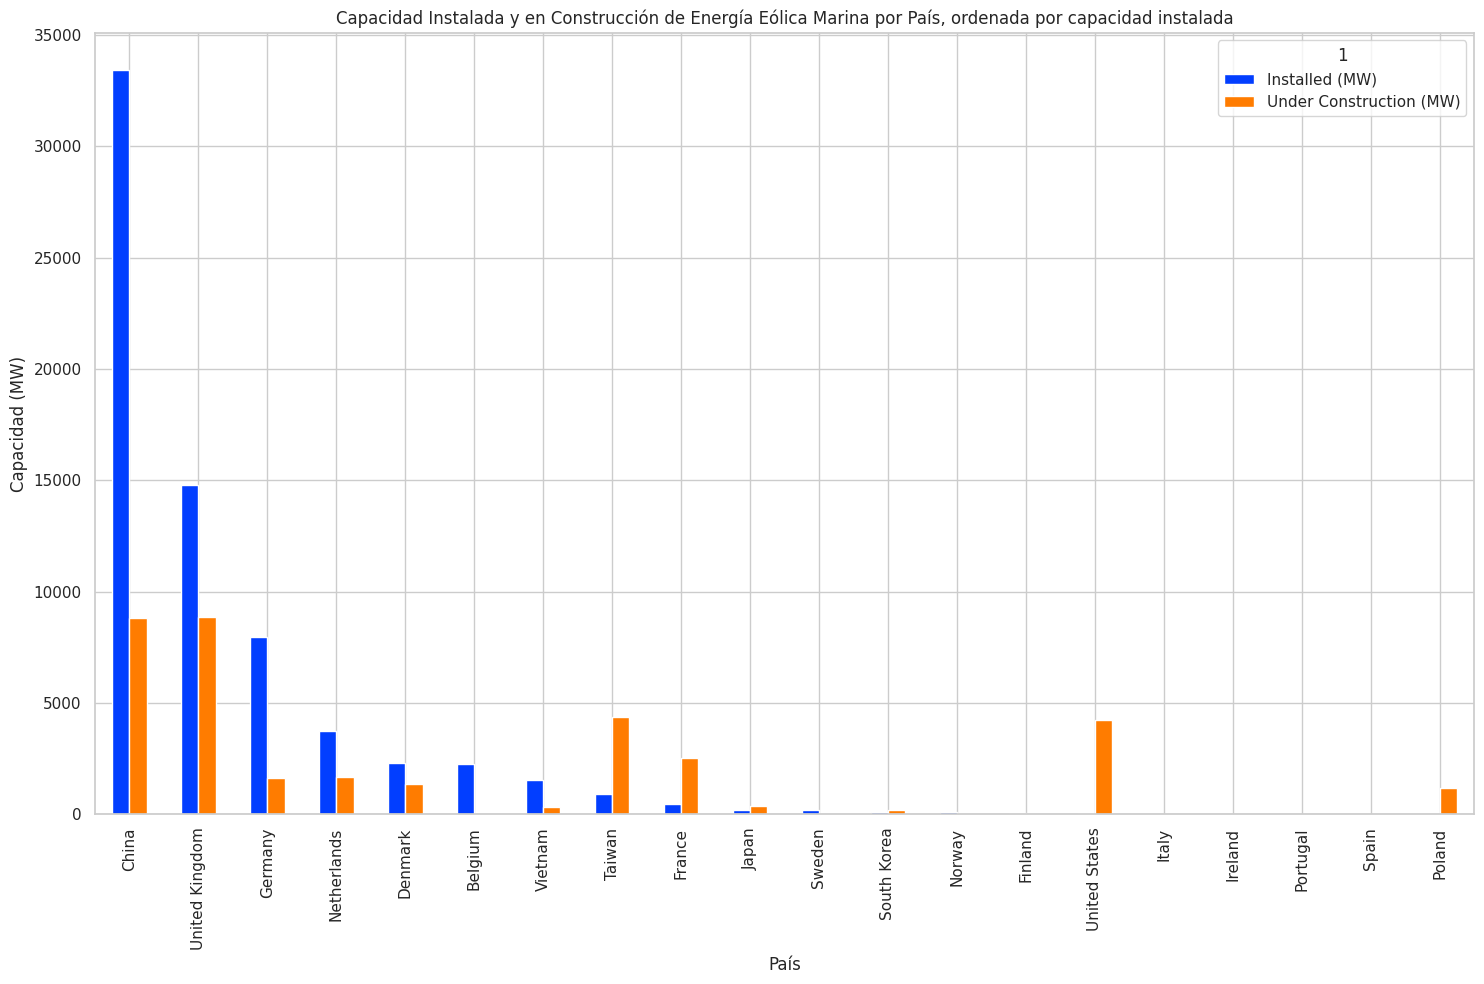

In [54]:
# Configura el tamaño de la figura
plt.figure(figsize=(15, 10))
df_NREL_ord_byins.plot(kind='bar', figsize=(15, 10))
# Configura las etiquetas de los ejes y el titulo
plt.xlabel('País')
plt.ylabel('Capacidad (MW)')
plt.title('Capacidad Instalada y en Construcción de Energía Eólica Marina por País, ordenada por capacidad instalada')
plt.xticks(rotation=90) ## Rotacion de etiquetas de eje X
plt.tight_layout()
plt.show()

In [55]:
## Ordenamiento por capacidad en construccion
df_NREL_ord_byconstru = df_NREL_ins_constru.sort_values(by="Under Construction (MW)", ascending=False)
df_NREL_ord_byconstru

1,Installed (MW),Under Construction (MW)
Figures 14 & 16: Installed and Under Construction Offshore Wind Energy Capacity by Country (MW),,
United Kingdom,14794.5,8880
China,33423.05,8814.2
Taiwan,908,4365.2
United States,42,4229
France,482,2521.2
Netherlands,3762,1672
Germany,7987.2,1631
Denmark,2308.8,1352
Poland,0,1200


<Figure size 1500x1000 with 0 Axes>

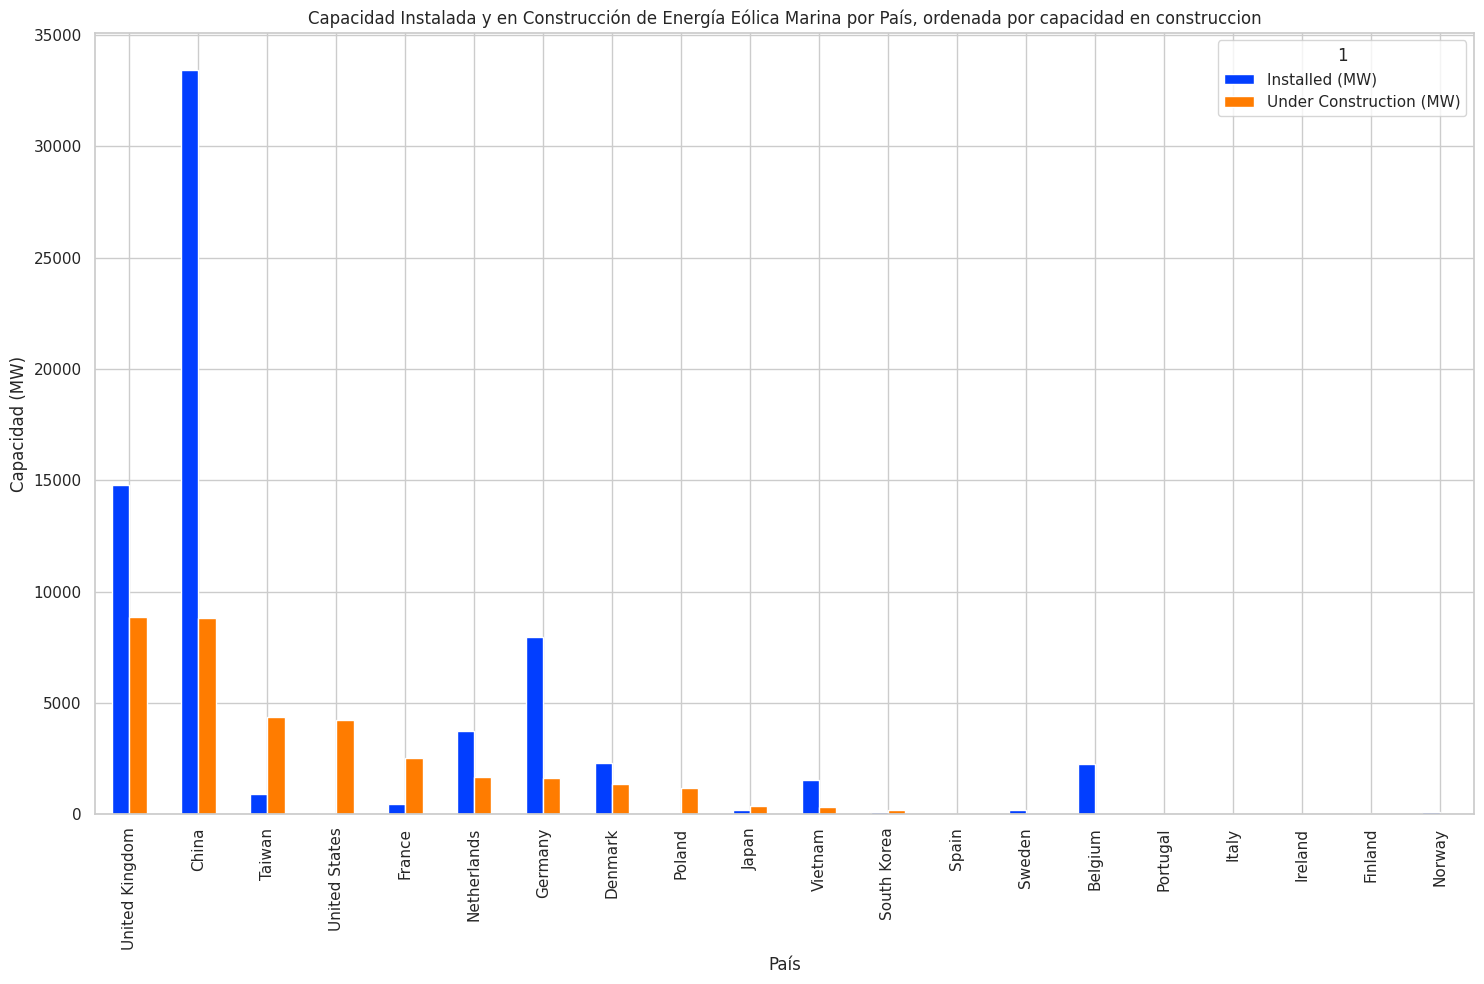

In [56]:
# Configura el tamaño de la figura
plt.figure(figsize=(15, 10))
df_NREL_ord_byconstru.plot(kind='bar', figsize=(15, 10))
# Configura las etiquetas de los ejes y el titulo
plt.xlabel('País')
plt.ylabel('Capacidad (MW)')
plt.title('Capacidad Instalada y en Construcción de Energía Eólica Marina por País, ordenada por capacidad en construccion')
plt.xticks(rotation=90) ## Rotacion de etiquetas de eje X
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

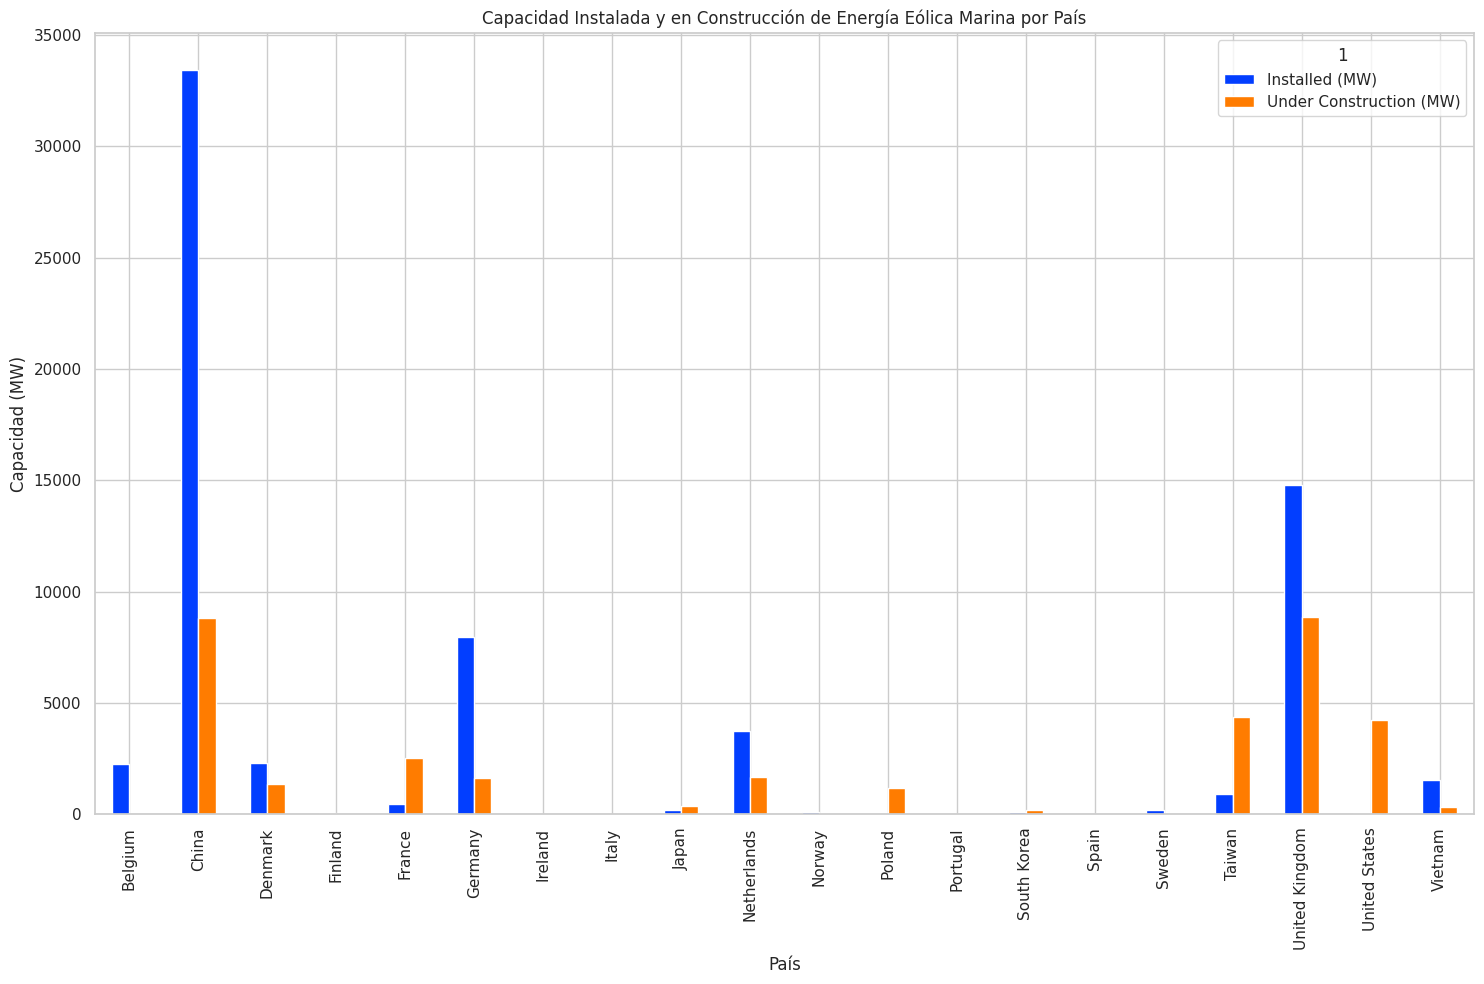

In [57]:
# Configura el tamaño de la figura
plt.figure(figsize=(15, 10))
df_NREL_ins_constru.plot(kind='bar', figsize=(15, 10))
# Configura las etiquetas de los ejes y el titulo
plt.xlabel('País')
plt.ylabel('Capacidad (MW)')
plt.title('Capacidad Instalada y en Construcción de Energía Eólica Marina por País')
plt.xticks(rotation=90) ## Rotacion de etiquetas de eje X
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

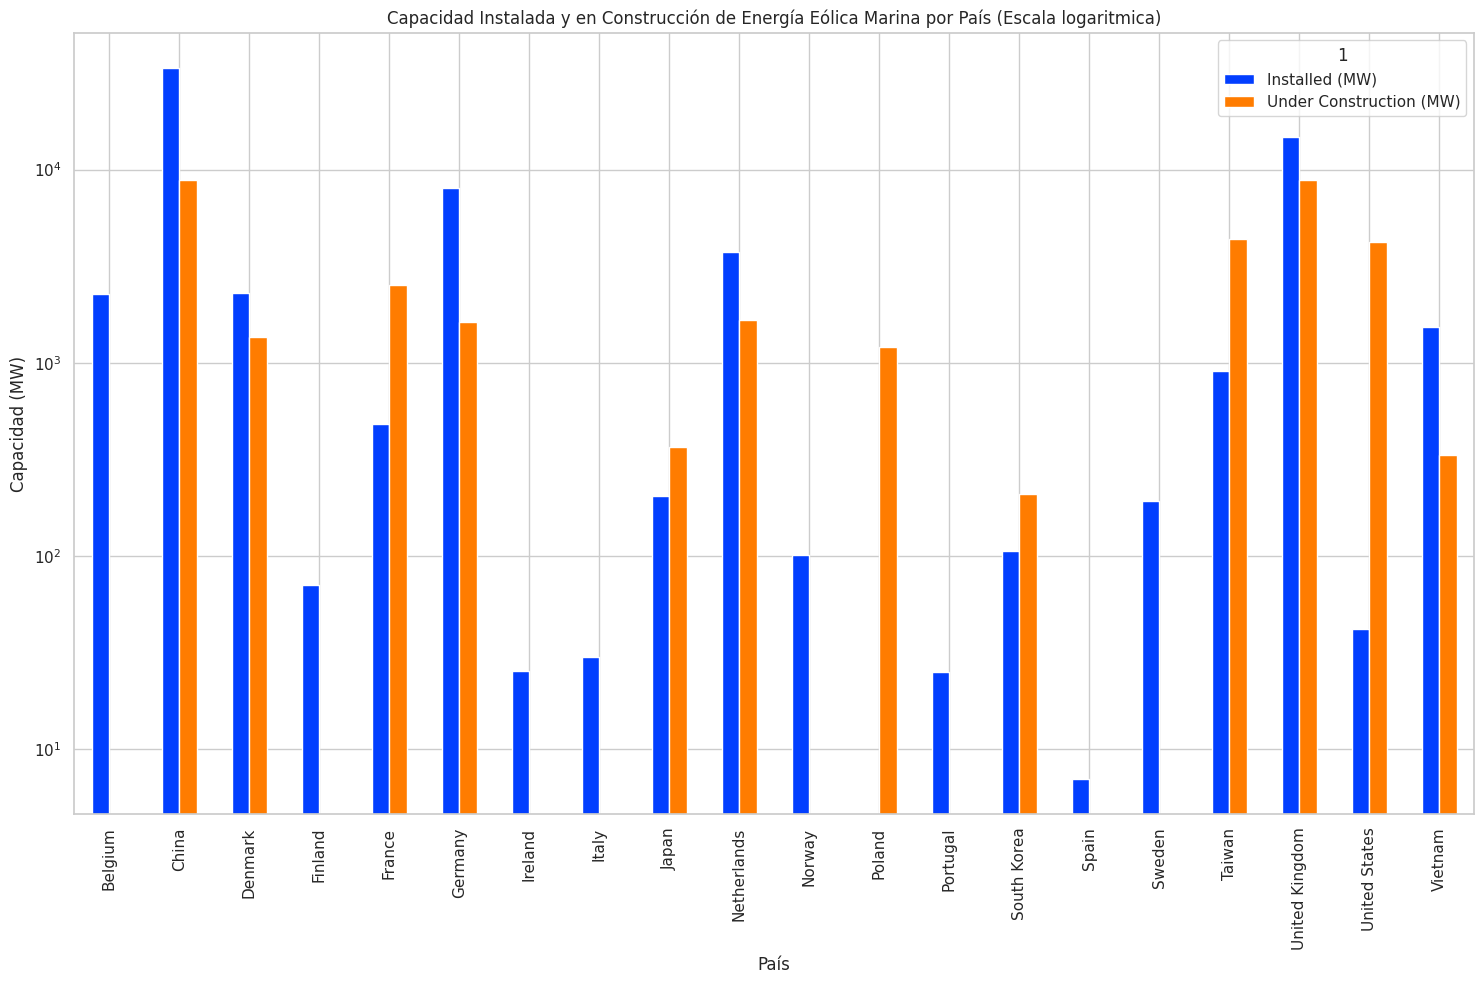

In [58]:
# Configura el tamaño de la figura
plt.figure(figsize=(15, 10))
df_NREL_ins_constru.plot(kind='bar', figsize=(15, 10))
# Configura las etiquetas de los ejes y el titulo
plt.xlabel('País')
plt.ylabel('Capacidad (MW)')
plt.title('Capacidad Instalada y en Construcción de Energía Eólica Marina por País (Escala logaritmica)')
plt.xticks(rotation=90) ## Rotacion de etiquetas de eje X
plt.yscale('log')
plt.tight_layout()
plt.show()

## Estimated cumulative global capacity

In [59]:
df_NREL['F17, Global Cumulative']

,Unnamed: 0,Figure 17: Estimated Cumulative Fixed-Bottom And Floating Offshore Wind Capacity By Country Based On Developer-Announced Cods,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Commercial Operation Date,Australia,Belgium,Brazil,Bulgaria,China,Denmark,Estonia,Faroe Is.,...,Portugal,Saudi Arabia,South Korea,Spain,Sweden,Taiwan,United Kingdom,United States,Vietnam,Total
2,NaN,1995,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,5
3,NaN,1996,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,21.8
4,NaN,1997,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,21.8
5,NaN,1998,0,0,0,0,0,5,0,0,...,0,0,0,0,3.3,0,0,0,0,25.1
6,NaN,1999,0,0,0,0,0,5,0,0,...,0,0,0,0,3.3,0,0,0,0,25.1
7,NaN,2000,0,0,0,0,0,5,0,0,...,0,0,0,0,3.3,0,0,0,0,25.1
8,NaN,2001,0,0,0,0,0,45,0,0,...,0,0,0,0,3.3,0,0,0,0,65.1
9,NaN,2002,0,0,0,0,0,205,0,0,...,0,0,0,0,3.3,0,0,0,0,225.1


In [ ]:
## Organizacion de datos en dataframe
data = df_NREL['F17, Global Cumulative'].drop("Unnamed: 0", axis=1)
columnas = data.loc[1]
indices = data["Figure 17: Estimated Cumulative Fixed-Bottom And Floating Offshore Wind Capacity By Country Based On Developer-Announced Cods"]

df_NREL_acum_esti_global = pd.DataFrame(data.values,
                                   columns = columnas,
                                   index = indices)
df_NREL_acum_esti_global = df_NREL_acum_esti_global.dropna()
df_NREL_acum_esti_global.drop('Commercial Operation Date', axis = 1, inplace= True)
df_NREL_acum_esti_global.drop('Total', axis = 1, inplace= True)
df_NREL_acum_esti_global

In [ ]:
df_NREL_acum_esti_global.columns

## **Capital Expenditures For Global Projects**<br>

Rolling capacity-weighted mean capital expenditure (CapEx) may refer to the process of depreciating actual CapEx over a period of time, and then rolling that depreciated amount forward.<br>
Global capacity-weighted mean capital expenditure (CapEx) can be used to compare capital spending across different regions and countries for infrastructure projects like renewable energy.

In [ ]:
df_NREL['F31, Project CapEx']

In [ ]:
## Organizacion de datos en dataframe
data = df_NREL['F31, Project CapEx'].drop("Unnamed: 0", axis=1)
columnas = data.loc[1]
indices = data["Figure 31: Capital Expenditures For Global Offshore Wind Energy Projects"]

df_NREL_CAPEX_global = pd.DataFrame(data.values,
                                   columns = columnas,
                                   index = indices)
df_NREL_CAPEX_global = df_NREL_CAPEX_global.dropna()
df_NREL_CAPEX_global.drop('Commercial Operation Date', axis = 1, inplace= True)
df_NREL_CAPEX_global.drop('Commercial Operation Date', inplace= True)
df_NREL_CAPEX_global

In [ ]:
df_NREL_CAPEX_global.columns

In [ ]:
"""
Analisis estadistico:
- Autocorrelacion de capacidad instalada
- Correlacion entre planeacion, montaje y desmontaje entre paises


Modelos predictivos:
- Tendencia de crecimiento y ubicacion de proyectos

"""

In [ ]:
"""
Graficos:
Mapamundi con ubicacion de proyectos (burbujas por potencia del proyecto), y centros cercanos de consumo
Mapamundi con mapa de calor con vientos

"""

# **Predictive models**<br>

# **Results & discussion**<br>

# **Conclusions<br>**

# **References<br>**

https://www.iea.org/data-and-statistics/charts/wind-power-capacity-in-the-net-zero-scenario-2015-2030

https://github.com/tzhang-edu/GOWT

https://www2.nrel.gov/wind/offshore-market-assessment

https://www.nature.com/articles/s41597-021-00982-z

https://ourworldindata.org/grapher/cumulative-installed-wind-energy-capacity-gigawatts